## Convolutional Model 

In this case the data will be converted to images using Gramian Angular Field. Using these images and the labels of tendency we will try to predict how the market will behave. This approach profit the way of representing timeseries as images to apply convolutional networks. This idea come from the way image detectors works.

In [ ]:
#https://towardsdatascience.com/time-series-forecasting-with-2d-convolutions-4f1a0f33dff6

!pip install pyts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
url="https://gitlab.com/ivan.jesus.torres/pmrl-tesla/-/raw/main/Datasets/Generated%20datasets/forecasting_label.csv"
df_ann = pd.read_csv(url)

print(df_ann.head())

                  date       close        high  ...  DMN_14  TTM_TRND_6  label
0  2020-04-14 13:00:00  146.417999  148.376007  ...     0.0           1    2.0
1  2020-04-14 14:00:00  144.806000  147.459991  ...     0.0           1    0.0
2  2020-04-14 15:00:00  145.809998  146.990005  ...     0.0           1    0.0
3  2020-04-14 16:00:00  146.475006  147.395981  ...     0.0           1    0.0
4  2020-04-14 17:00:00  145.565002  147.736404  ...     0.0           1    2.0

[5 rows x 19 columns]


In [ ]:
time_vector = list(df_ann['date'])
print(time_vector)

['2020-04-14 13:00:00', '2020-04-14 14:00:00', '2020-04-14 15:00:00', '2020-04-14 16:00:00', '2020-04-14 17:00:00', '2020-04-14 18:00:00', '2020-04-14 19:00:00', '2020-04-15 13:00:00', '2020-04-15 14:00:00', '2020-04-15 15:00:00', '2020-04-15 16:00:00', '2020-04-15 17:00:00', '2020-04-15 18:00:00', '2020-04-15 19:00:00', '2020-04-16 13:00:00', '2020-04-16 14:00:00', '2020-04-16 15:00:00', '2020-04-16 16:00:00', '2020-04-16 17:00:00', '2020-04-16 18:00:00', '2020-04-16 19:00:00', '2020-04-17 13:00:00', '2020-04-17 14:00:00', '2020-04-17 15:00:00', '2020-04-17 16:00:00', '2020-04-17 17:00:00', '2020-04-17 18:00:00', '2020-04-17 19:00:00', '2020-04-20 13:00:00', '2020-04-20 14:00:00', '2020-04-20 15:00:00', '2020-04-20 16:00:00', '2020-04-20 17:00:00', '2020-04-20 18:00:00', '2020-04-20 19:00:00', '2020-04-21 13:00:00', '2020-04-21 14:00:00', '2020-04-21 15:00:00', '2020-04-21 16:00:00', '2020-04-21 17:00:00', '2020-04-21 18:00:00', '2020-04-21 19:00:00', '2020-04-22 13:00:00', '2020-04-2

In [ ]:
df_ann.shape

(1741, 19)

In [ ]:
df_ann.head(1)

,date,close,high,low,volume,tesla,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,TTM_TRND_6,label
0,2020-04-14 13:00:00,146.417999,148.376007,138.731995,11488192.0,92.0,135.1941,141.118793,147.043486,8.396746,100.0,4.47009,-0.267105,4.737195,100.0,82.036626,0.0,1,2.0


In [ ]:
titles = [
    "Close",
    "High",
    "Low",
    "Volume",
    "Pytrends",
    "BBL_5_2.0",
    "BBM_5_2.0",
    "BBU_5_2.0",
    "BBB_5_2.0",
    "RSI_14",
    "MACD_12_26_9",
    "MACDh_12_26_9",
    "MACDs_12_26_9",
    "ADX_14",
    "DMP_14",
    "DMN_14",
    "TTM_TRND_6",
    "Label",
]

feature_keys = [
    "close",
    "high",
    "low",
    "volume",
    "tesla",
    "BBL_5_2.0",
    "BBM_5_2.0",
    "BBU_5_2.0",
    "BBB_5_2.0",
    "RSI_14",
    "MACD_12_26_9",
    "MACDh_12_26_9",
    "MACDs_12_26_9",
    "ADX_14",
    "DMP_14",
    "DMN_14",
    "TTM_TRND_6",
    "label",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
]

In [ ]:
final_dataset = df_ann.values
print(final_dataset)

[['2020-04-14 13:00:00' 146.41799926757812 148.37600708007812 ... 0.0 1
  2.0]
 ['2020-04-14 14:00:00' 144.80599975585938 147.45999145507812 ... 0.0 1
  0.0]
 ['2020-04-14 15:00:00' 145.80999755859375 146.99000549316406 ... 0.0 1
  0.0]
 ...
 ['2021-04-09 17:00:00' 672.2484741210938 678.489990234375 ...
  28.76674492586141 -1 0.0]
 ['2021-04-09 18:00:00' 674.3499755859375 675.1434936523438 ...
  26.925962265490185 -1 0.0]
 ['2021-04-09 19:00:00' 677.02001953125 677.489990234375 ...
  24.862114565405715 1 0.0]]


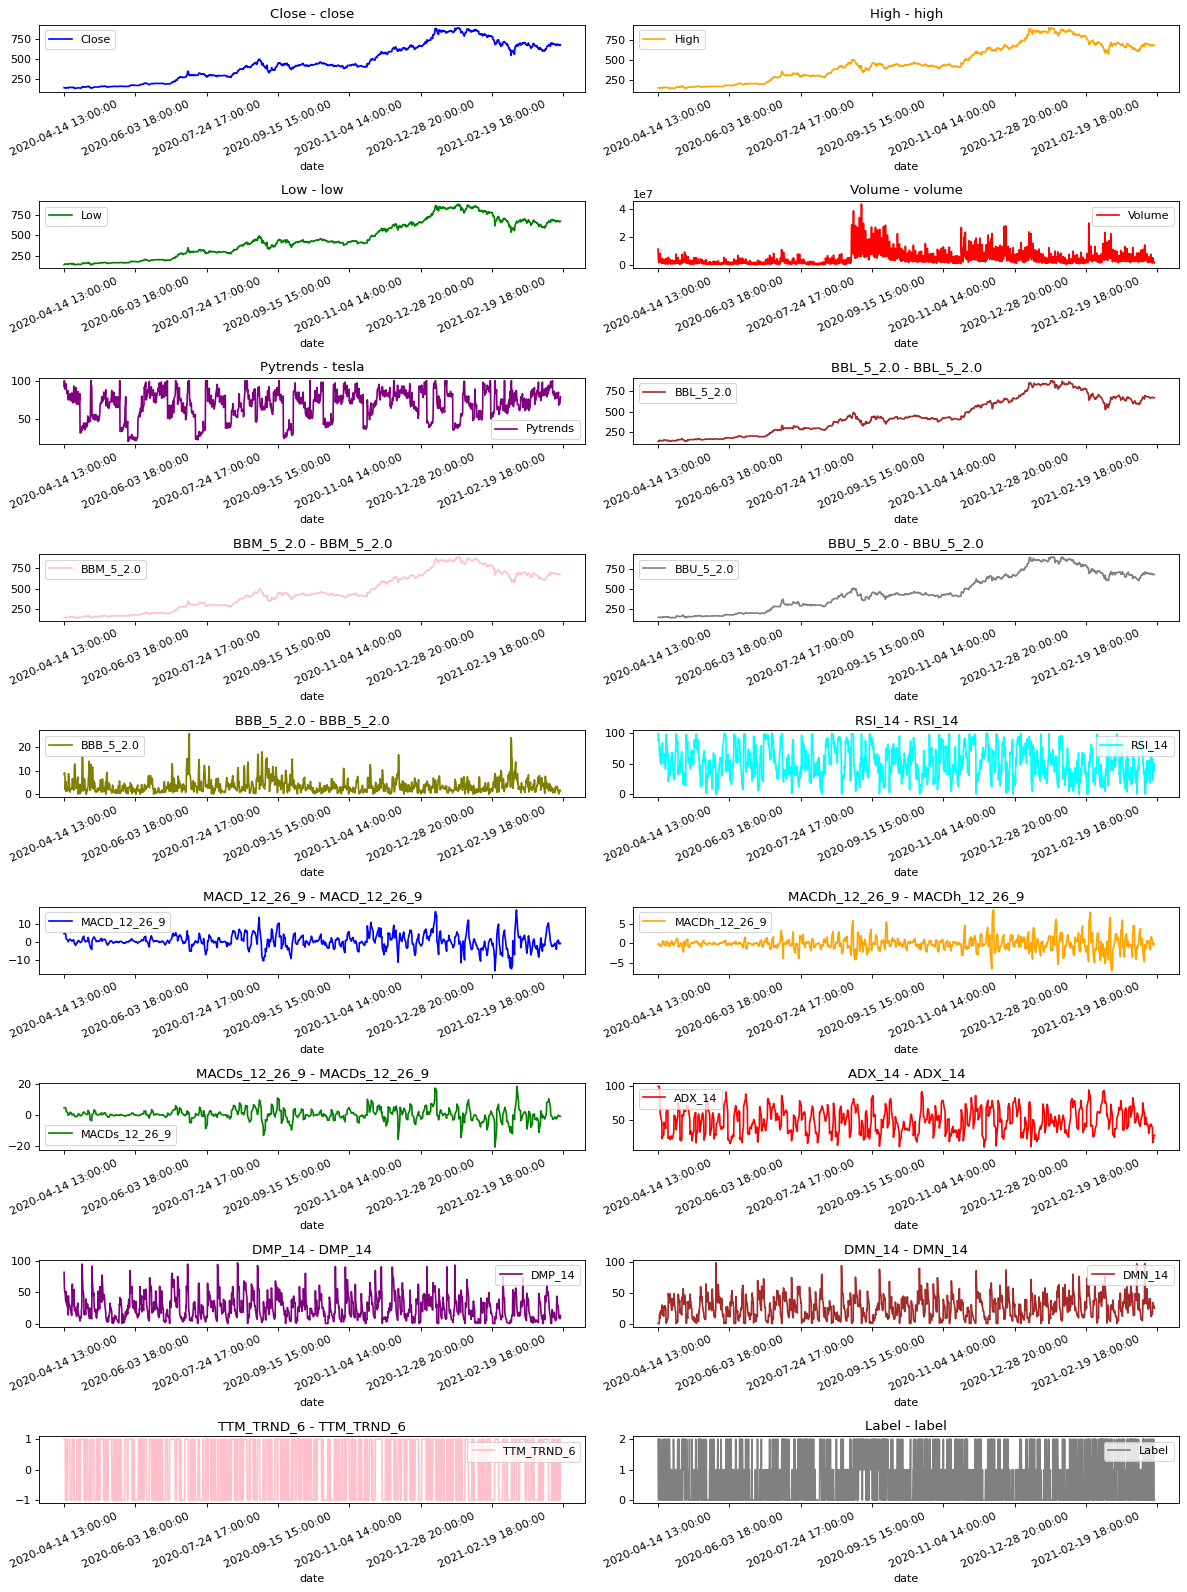

In [ ]:
date_time_key = "date"
def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=9, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df_ann)

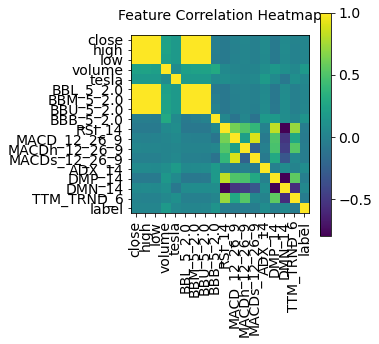

In [ ]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df_ann[feature_keys])

In [ ]:
split_fraction = 0.8
train_split = int(split_fraction * int(df_ann.shape[0]))
step = 1 # How much time passes between data. We have data every hour so 1

past = 5*6 # Number of days * 6 hours (Time that the market is open - 1 hour)=> Use data from 30 previous hours
future = 0 #Do the prediction 0 hour after the actual hour (This time is 0 because the label is calulated using the actual and the following hour)
learning_rate = 0.0000000001 #Learning rate
batch_size = 10 #256
epochs = 80000 #800

In [ ]:
import numpy as np
selec=np.array([0,1,2,3,4,5,6,7])
print(selec+1)

[1 2 3 4 5 6 7 8]


In [ ]:
print(final_dataset)
final_no_date=final_dataset[:,selec+1]
print(final_no_date)

[['2020-04-14 13:00:00' 146.41799926757812 148.37600708007812 ... 0.0 1
  2.0]
 ['2020-04-14 14:00:00' 144.80599975585938 147.45999145507812 ... 0.0 1
  0.0]
 ['2020-04-14 15:00:00' 145.80999755859375 146.99000549316406 ... 0.0 1
  0.0]
 ...
 ['2021-04-09 17:00:00' 672.2484741210938 678.489990234375 ...
  28.76674492586141 -1 0.0]
 ['2021-04-09 18:00:00' 674.3499755859375 675.1434936523438 ...
  26.925962265490185 -1 0.0]
 ['2021-04-09 19:00:00' 677.02001953125 677.489990234375 ...
  24.862114565405715 1 0.0]]
[[146.41799926757812 148.37600708007812 138.73199462890622 ...
  135.19409969616459 141.11879272460936 147.04348575305409]
 [144.80599975585938 147.45999145507812 141.31283569335938 ...
  135.6467572142827 142.1211944580078 148.5956317017329]
 [145.80999755859375 146.99000549316406 144.39999389648438 ...
  136.77678064050002 143.32439575195312 149.87201086340622]
 ...
 [672.2484741210938 678.489990234375 671.5133056640625 ...
  668.9493952027722 675.1436767578125 681.337958312852

In [ ]:
print(df_ann["label"].tolist())

[2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0,

## Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in selec]),
)
selected_features = [feature_keys[i] for i in selec]
features = df_ann[selected_features]
features.index = df_ann[date_time_key]
#print(features.head())
features=features.values

scaler = MinMaxScaler(feature_range=(0,1))

features = pd.DataFrame(features[:,:])

features[features.columns] = scaler.fit_transform(features[features.columns])
#print(features.shape)
#print(features.head())

features.insert(features.shape[1], "label", df_ann["label"].tolist())
#print(features.head())
features_scaled_w_date=pd.DataFrame(features)
features_scaled_w_date.insert(0,"date",df_ann[date_time_key])
#print(features_scaled_w_date.head())
train_data = features.loc[0 : train_split - 1]
#print(train_data)
val_data = features.loc[train_split:]

The selected parameters are: Close, High, Low, Volume, Pytrends, BBL_5_2.0, BBM_5_2.0, BBU_5_2.0


In [ ]:
selec.size

8

## Get train data

In [ ]:
start = past + future
end = start + train_split
print([i+1 for i in range(selec.size)])
x_train = train_data[[i for i in range(selec.size)]].values
print(x_train)
print(features.head())
y_train = features.iloc[start:end]["label"]
print(y_train)
sequence_length = int(past / step)
print(sequence_length)

[1, 2, 3, 4, 5, 6, 7, 8]
[[0.01203535 0.01139532 0.00528112 ... 0.00201148 0.00154463 0.00641996]
 [0.00989727 0.01019114 0.00871084 ... 0.0026155  0.00288187 0.00847444]
 [0.01122893 0.0095733  0.01281342 ... 0.00412339 0.00448699 0.01016391]
 ...
 [0.96466597 0.9710395  0.96200621 ... 0.9712976  0.98316581 0.9928785 ]
 [0.96466597 0.96245526 0.96530198 ... 0.96632872 0.97754152 0.98664645]
 [0.91532554 0.9074527  0.8973145  ... 0.88629361 0.89851429 0.90921461]]
                  date         0         1  ...         6         7  label
0  2020-04-14 13:00:00  0.012035  0.011395  ...  0.001545  0.006420    2.0
1  2020-04-14 14:00:00  0.009897  0.010191  ...  0.002882  0.008474    0.0
2  2020-04-14 15:00:00  0.011229  0.009573  ...  0.004487  0.010164    0.0
3  2020-04-14 16:00:00  0.012111  0.010107  ...  0.006270  0.010684    0.0
4  2020-04-14 17:00:00  0.010904  0.010555  ...  0.007809  0.006608    2.0

[5 rows x 10 columns]
30      0.0
31      0.0
32      1.0
33      2.0
34      0.

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]))
print(x_train.shape)
print(y_train.shape)

(1392, 8)
(1392,)


In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length+1,
    sampling_rate=step,
    batch_size=batch_size,
)
print(dataset_train)

<BatchDataset shapes: ((None, None, 8), (None,)), types: (tf.float64, tf.float64)>


## Transform data to images

This part transform each column from each dataserie of the train dataset to an image. Then the images from every feature of a timeserie is concatenated vertically to have an image showing the representation of a timeserie with all the feature this will be used as input for the neural net. The label for each image is also saved.

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


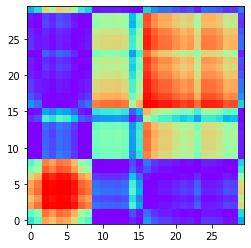

In [ ]:
from pyts.image import GramianAngularField
import cv2

transformer = GramianAngularField(image_size=past, method='summation')
im_v=[]
images_train=[]
labels_train=[]
for x, y in dataset_train:
  x_num=x.numpy()
  y_num=y.numpy()
  #print(x.shape)
  #print(y)
  for j in range(x_num.shape[0]):
    #print(x_num[j,:,:])
    #print(y_num[j])
    for k in range(x_num.shape[2]):
      X_new = transformer.fit_transform(x_num[j,:,k].reshape(1,past+1))
      #print(X_new)
      #im = plt.imshow(X_new.reshape(past,past), cmap='rainbow', origin='lower')
      im_v.append(X_new.reshape(past,past))
      #print(im_v.index)
      #plt.show()
      #input()
    im_v_=cv2.vconcat(im_v)
    images_train.append(im_v_)
    labels_train.append(y_num[j])
    #im_=plt.imshow(im_v_)
    #plt.show()
    #print(images)
    #print(labels_im)
    #input()
    im_v=[] 
#Image_Tendency_0_0  
im = plt.imshow(X_new.reshape(past,past), cmap='rainbow', origin='lower') #Show one image with the data of a feature    
plt.show()  

In [ ]:
print(np.shape(images_train))
print(np.shape(labels_train))

(1362, 240, 30)
(1362,)


In [ ]:
print(np.max(images_train))
print(np.min(images_train))

1.0000000000000142
-1.0000000000000036


## Prepare validation data

The process to obtain the images is the same as we did with the training dataset.

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(selec.size)]].values
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
print(x_val.shape)
y_val = features.iloc[label_start:]["label"]
print(y_val.shape)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length+1,
    sampling_rate=step,
    batch_size=batch_size,
)
print(dataset_val)
transformer = GramianAngularField(image_size=past, method='summation')
im_v=[]
images_val=[]
labels_val=[]
for x, y in dataset_val:
  x_num=x.numpy()
  y_num=y.numpy()
  #print(x.shape)
  #print(y)
  for j in range(x_num.shape[0]):
    #print(x_num[j,:,:])
    #print(y_num[j])
    for k in range(x_num.shape[2]):
      X_new = transformer.fit_transform(x_num[j,:,k].reshape(1,past+1))
      #print(X_new)
      #im = plt.imshow(X_new.reshape(past,past), cmap='rainbow', origin='lower')
      im_v.append(X_new.reshape(past,past))
      #print(im_v.index)
      #plt.show()
      #input()
    im_v_=cv2.vconcat(im_v)
    images_val.append(im_v_)
    labels_val.append(y_num[j])
    #im_=plt.imshow(im_v_)
    #plt.show()
    #print(images)
    #print(labels_im)
    #input()
    im_v=[]


(319, 8, 1)
(319,)
<BatchDataset shapes: ((None, None, 8, 1), (None,)), types: (tf.float64, tf.float64)>


In [ ]:
print(np.shape(images_val))
print(np.shape(labels_val))

(289, 240, 30)
(289,)


In [ ]:
print(np.max(images_val))
print(np.min(images_val))

1.0000000000000142
-1.0000000000000036


In [ ]:
print(x_val.shape)

(319, 8, 1)


## Build the model

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
num_classes=3
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),activation='linear',input_shape=(past*selec.size,past,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#TENDENCY_0_summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 30, 32)       160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 240, 30, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 15, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 15, 64)       18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 15, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 8, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 8, 128)        7

## Reshape tensors to feed the network

In this section the labels will be changed to categorical to feed the network. Moreover the tensor will be reshaped to fit the network requirements.

In [ ]:
images_train_tensor=tf.convert_to_tensor(images_train)
print(np.shape(images_train)[0])
images_train_tensor=tf.reshape(images_train_tensor,[np.shape(images_train)[0],np.shape(images_train)[1],np.shape(images_train)[2],1])
#print(images_train_tensor)

1362


In [ ]:
labels_train_tensor=tf.convert_to_tensor(tf.keras.utils.to_categorical(labels_train))
labels_train_tensor=tf.reshape(labels_train_tensor,[np.shape(labels_train)[0],num_classes])
print(labels_train_tensor)


tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(1362, 3), dtype=float32)


In [ ]:
images_val_tensor=tf.convert_to_tensor(images_val)
#print(np.shape(images_val)[0])
images_val_tensor=tf.reshape(images_val_tensor,[np.shape(images_val)[0],np.shape(images_val)[1],np.shape(images_val)[2],1])
#print(images_val_tensor)
#print(labels_val)
labels_val_tensor=tf.convert_to_tensor(tf.keras.utils.to_categorical(labels_val))
labels_val_tensor=tf.reshape(labels_val_tensor,[np.shape(labels_val)[0],num_classes])
#print(labels_val_tensor)


In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.00000000000000001, patience=80)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    images_train_tensor, labels_train_tensor,
    batch_size=batch_size,epochs=epochs,
    validation_data=(images_val_tensor, labels_val_tensor),
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/80000
137/137 [==============================] - 15s 11ms/step - loss: 1.0575 - accuracy: 0.5594 - val_loss: 1.0202 - val_accuracy: 0.5294

Epoch 00001: val_accuracy improved from -inf to 0.52941, saving model to model_checkpoint.h5
Epoch 2/80000
137/137 [==============================] - 1s 5ms/step - loss: 0.9503 - accuracy: 0.5981 - val_loss: 1.0092 - val_accuracy: 0.5675

Epoch 00002: val_accuracy improved from 0.52941 to 0.56747, saving model to model_checkpoint.h5
Epoch 3/80000
137/137 [==============================] - 1s 6ms/step - loss: 0.9307 - accuracy: 0.6143 - val_loss: 0.9893 - val_accuracy: 0.5329

Epoch 00003: val_accuracy did not improve from 0.56747
Epoch 4/80000
137/137 [==============================] - 1s 6ms/step - loss: 0.8509 - accuracy: 0.6226 - val_loss: 1.0487 - val_accuracy: 0.5433

Epoch 00004: val_accuracy did not improve from 0.56747
Epoch 5/80000
137/137 [==============================] - 1s 6ms/step - loss: 0.8024 - accuracy: 0.6380 - val_loss: 

## Evaluation

In [ ]:
test_eval = model.evaluate(images_val_tensor, labels_val_tensor, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1]*100)

Test loss: 7.2181525230407715
Test accuracy: 49.480968713760376


In [ ]:
predicted_classes = model.predict(images_val_tensor)

In [ ]:
predicted_classes.shape, np.shape(images_val)

((289, 3), (289, 240, 30))

In [ ]:
predicted_classes=np.argmax(predicted_classes, axis=1, out=None)
print(predicted_classes)

[0 0 0 1 0 0 0 0 1 1 1 0 2 0 0 0 0 2 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 1 2 0 0 1 0 0 1 0 0 0 0 0 0 1 2 2 2 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 2 0 2 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 2 0 0 1 2 1
 2 1 1 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 2 0 1 0 0
 0 0 1 2 2 2 2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0]


In [ ]:
incorrect = np.where(predicted_classes!=labels_val)[0]
print("Found %d incorrect labels" % len(incorrect))
print("Of %d" % len(predicted_classes))

Found 146 incorrect labels
Of 289


In [ ]:
#Table_2
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(labels_val, predicted_classes, target_names=target_names))



              precision    recall  f1-score   support

     Class 0       0.58      0.78      0.67       154
     Class 1       0.27      0.21      0.24        61
     Class 2       0.29      0.14      0.19        74

    accuracy                           0.49       289
   macro avg       0.38      0.38      0.36       289
weighted avg       0.44      0.49      0.45       289

